In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
year=23

In [63]:
fifa_teams = pd.read_csv('./data/fifa_teams.csv')
fifa_teams.head()

,team,code,country,confederation
0,Afghanistan,AFG,Afghanistan,AFC
1,Albania,ALB,Albania,UEFA
2,Algeria,ALG,Algeria,CAF
3,American Samoa,ASA,American Samoa,OFC
4,Andorra,AND,Andorra,UEFA


In [29]:
players = pd.read_csv(f'./data/players/FIFA{year}_official_data.csv')
players.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN


In [30]:
players.info()
players.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17660 non-null  int64  
 1   Name                      17660 non-null  object 
 2   Age                       17660 non-null  int64  
 3   Photo                     17660 non-null  object 
 4   Nationality               17660 non-null  object 
 5   Flag                      17660 non-null  object 
 6   Overall                   17660 non-null  int64  
 7   Potential                 17660 non-null  int64  
 8   Club                      17449 non-null  object 
 9   Club Logo                 17660 non-null  object 
 10  Value                     17660 non-null  object 
 11  Wage                      17660 non-null  object 
 12  Special                   17660 non-null  int64  
 13  Preferred Foot            17660 non-null  object 
 14  Intern

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Kit Number
count,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17625.000000
mean,246319.424462,23.127746,63.369592,70.981200,1537.915855,1.106285,2.900340,2.297169,25.037957
std,31487.892861,4.639821,8.036268,6.529836,285.893809,0.407021,0.663523,0.754264,19.154116
min,16.000000,15.000000,43.000000,42.000000,749.000000,1.000000,1.000000,1.000000,1.000000
25%,240732.500000,20.000000,58.000000,67.000000,1387.000000,1.000000,3.000000,2.000000,11.000000
50%,257041.000000,22.000000,63.000000,71.000000,1548.000000,1.000000,3.000000,2.000000,22.000000
75%,263027.500000,26.000000,69.000000,75.000000,1727.000000,1.000000,3.000000,3.000000,32.000000
max,271340.000000,54.000000,91.000000,95.000000,2312.000000,5.000000,5.000000,5.000000,99.000000


In [31]:
numeric_cols = players.select_dtypes(include=['number']).columns
print(numeric_cols)

non_numeric_cols = players.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['ID', 'Age', 'Overall', 'Potential', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Kit Number'],
      dtype='object')
Index(['Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Value',
       'Wage', 'Preferred Foot', 'Work Rate', 'Body Type', 'Real Face',
       'Position', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height',
       'Weight', 'Release Clause', 'Best Overall Rating'],
      dtype='object')


In [40]:
keepcolumns = ['Name','Photo', 'Age', 'Position', 'Nationality', 'Flag', 
               'Overall', 'Potential', 'Value', 'Wage', 'Height', 'Weight', 'Preferred Foot',
               'Club', 'Club Logo', 'Kit Number']

In [53]:
players = pd.read_csv(f'./data/players/FIFA{year}_official_data.csv', usecols=keepcolumns)
players.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Preferred Foot,Position,Height,Weight,Kit Number
0,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,€91M,€115K,Right,"<span class=""pos pos28"">SUB",189cm,82kg,8.0
1,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,€78.5M,€190K,Right,"<span class=""pos pos15"">LCM",179cm,69kg,8.0
2,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,€46.5M,€46K,Left,"<span class=""pos pos7"">LB",172cm,69kg,19.0
3,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,€107.5M,€350K,Right,"<span class=""pos pos13"">RCM",181cm,70kg,17.0
4,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,€89.5M,€110K,Right,"<span class=""pos pos13"">RCM",172cm,68kg,23.0


In [54]:
players.info()
players.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            17660 non-null  object 
 1   Age             17660 non-null  int64  
 2   Photo           17660 non-null  object 
 3   Nationality     17660 non-null  object 
 4   Flag            17660 non-null  object 
 5   Overall         17660 non-null  int64  
 6   Potential       17660 non-null  int64  
 7   Club            17449 non-null  object 
 8   Club Logo       17660 non-null  object 
 9   Value           17660 non-null  object 
 10  Wage            17660 non-null  object 
 11  Preferred Foot  17660 non-null  object 
 12  Position        17625 non-null  object 
 13  Height          17660 non-null  object 
 14  Weight          17660 non-null  object 
 15  Kit Number      17625 non-null  float64
dtypes: float64(1), int64(3), object(12)
memory usage: 2.2+ MB


,Age,Overall,Potential,Kit Number
count,17660.000000,17660.000000,17660.000000,17625.000000
mean,23.127746,63.369592,70.981200,25.037957
std,4.639821,8.036268,6.529836,19.154116
min,15.000000,43.000000,42.000000,1.000000
25%,20.000000,58.000000,67.000000,11.000000
50%,22.000000,63.000000,71.000000,22.000000
75%,26.000000,69.000000,75.000000,32.000000
max,54.000000,91.000000,95.000000,99.000000


In [55]:
# columns and number of missing values
num_missing = players.isna().sum()
num_missing[:]

Name                0
Age                 0
Photo               0
Nationality         0
Flag                0
Overall             0
Potential           0
Club              211
Club Logo           0
Value               0
Wage                0
Preferred Foot      0
Position           35
Height              0
Weight              0
Kit Number         35
dtype: int64

<AxesSubplot: >

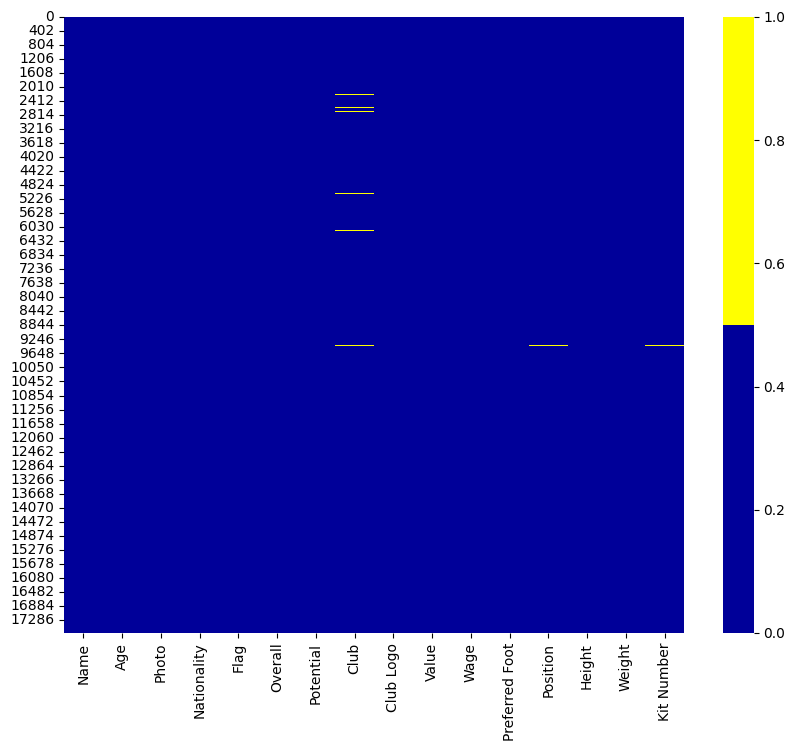

In [56]:
# Heatmap to visualize missing data
plt.figure(figsize=(10,8))

# first 30 columns
cols = players.columns[:]
colours =['#000099', '#ffff00']
sns.heatmap(players[cols].isna(), cmap=sns.color_palette(colours))

In [58]:
# Cleaning position
players['Position'] = players['Position'].str.replace(r'<[^<>]*>', '', regex=True)

In [64]:
players[players['Club'].isna()]

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Preferred Foot,Position,Height,Weight,Kit Number
162,21 Santi Cazorla,35,https://cdn.sofifa.net/players/146/562/21_60.png,Spain,https://cdn.sofifa.net/flags/es.png,82,82,NaN,https://cdn.sofifa.net/flags/es.png,€0,€0,Right,SUB,168cm,65kg,20.0
383,21 M. Nérez,32,https://cdn.sofifa.net/players/245/308/21_60.png,Uruguay,https://cdn.sofifa.net/flags/uy.png,80,80,NaN,https://cdn.sofifa.net/flags/uy.png,€0,€0,Left,LB,178cm,69kg,3.0
435,A. Ayew,32,https://cdn.sofifa.net/players/176/571/23_60.png,Ghana,https://cdn.sofifa.net/flags/gh.png,75,75,NaN,https://cdn.sofifa.net/flags/gh.png,€0,€0,Left,ST,176cm,72kg,10.0
463,22 M. Hinteregger,28,https://cdn.sofifa.net/players/201/922/22_60.png,Austria,https://cdn.sofifa.net/flags/at.png,79,79,NaN,https://cdn.sofifa.net/flags/at.png,€0,€0,Left,LCB,186cm,82kg,4.0
497,Š. Vrsaljko,30,https://cdn.sofifa.net/players/203/890/23_60.png,Croatia,https://cdn.sofifa.net/flags/hr.png,79,79,NaN,https://cdn.sofifa.net/flags/hr.png,€0,€0,Right,RB,181cm,76kg,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16791,20 R. Goss,25,https://cdn.sofifa.net/players/253/949/20_60.png,South Africa,https://cdn.sofifa.net/flags/za.png,61,65,NaN,https://cdn.sofifa.net/flags/za.png,€0,€0,Right,SUB,181cm,75kg,16.0
16835,22 I. Al Kaabi,28,https://cdn.sofifa.net/players/257/550/22_60.png,United Arab Emirates,https://cdn.sofifa.net/flags/ae.png,59,62,NaN,https://cdn.sofifa.net/flags/ae.png,€0,€0,Right,NaN,183cm,82kg,NaN
16968,S. Kittos,20,https://cdn.sofifa.net/players/267/767/23_60.png,Cyprus,https://cdn.sofifa.net/flags/cy.png,58,68,NaN,https://cdn.sofifa.net/flags/cy.png,€0,€0,Right,NaN,186cm,75kg,NaN
17004,21 E. Ira Tape,22,https://cdn.sofifa.net/players/252/359/21_60.png,Côte d'Ivoire,https://cdn.sofifa.net/flags/ci.png,61,70,NaN,https://cdn.sofifa.net/flags/ci.png,€0,€0,Right,SUB,192cm,85kg,1.0


In [61]:
players['Nationality'].value_counts()

England                  1531
Germany                  1038
Spain                     990
France                    864
Argentina                 843
                         ... 
Korea DPR                   1
Vietnam                     1
Kuwait                      1
Philippines                 1
Saint Kitts and Nevis       1
Name: Nationality, Length: 161, dtype: int64

In [62]:
players.nlargest(10,'Overall')

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Preferred Foot,Position,Height,Weight,Kit Number
3,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,€107.5M,€350K,Right,RCM,181cm,70kg,17.0
41,R. Lewandowski,33,https://cdn.sofifa.net/players/188/545/23_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,91,91,FC Barcelona,https://cdn.sofifa.net/teams/241/30.png,€84M,€420K,Right,ST,185cm,81kg,9.0
56,L. Messi,35,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,91,91,Paris Saint-Germain,https://cdn.sofifa.net/teams/73/30.png,€54M,€195K,Left,RW,169cm,67kg,30.0
75,K. Mbappé,23,https://cdn.sofifa.net/players/231/747/23_60.png,France,https://cdn.sofifa.net/flags/fr.png,91,95,Paris Saint-Germain,https://cdn.sofifa.net/teams/73/30.png,€190.5M,€230K,Right,ST,182cm,73kg,7.0
124,K. Benzema,34,https://cdn.sofifa.net/players/165/153/23_60.png,France,https://cdn.sofifa.net/flags/fr.png,91,91,Real Madrid CF,https://cdn.sofifa.net/teams/243/30.png,€64M,€450K,Right,CF,185cm,81kg,9.0
25,M. Salah,30,https://cdn.sofifa.net/players/209/331/23_60.png,Egypt,https://cdn.sofifa.net/flags/eg.png,90,90,Liverpool,https://cdn.sofifa.net/teams/9/30.png,€115.5M,€270K,Left,RW,175cm,71kg,11.0
100,Cristiano Ronaldo,37,https://cdn.sofifa.net/players/020/801/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,90,90,Manchester United,https://cdn.sofifa.net/teams/11/30.png,€41M,€220K,Right,ST,187cm,83kg,7.0
192,V. van Dijk,30,https://cdn.sofifa.net/players/203/376/23_60.png,Netherlands,https://cdn.sofifa.net/flags/nl.png,90,90,Liverpool,https://cdn.sofifa.net/teams/9/30.png,€98M,€230K,Right,LCB,193cm,92kg,4.0
9151,M. Neuer,36,https://cdn.sofifa.net/players/167/495/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,90,90,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,€13.5M,€72K,Right,GK,193cm,93kg,1.0
14357,T. Courtois,30,https://cdn.sofifa.net/players/192/119/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,90,91,Real Madrid CF,https://cdn.sofifa.net/teams/243/30.png,€90M,€250K,Left,GK,199cm,96kg,1.0


In [71]:
nationalities_to_be_modified = list(set(players['Nationality'].unique()) -set(fifa_teams['team'].unique()) )
nationalities_to_be_modified.sort()
print(nationalities_to_be_modified)

['Cape Verde Islands', 'China PR', 'Congo DR', 'Curacao', "Côte d'Ivoire", 'Guinea Bissau', 'Korea DPR', 'Korea Republic']


In [72]:
modified_into = ['Cape Verde', 'China', 'DR Congo', 'Curaçao', 'Ivory Coast', 'Guinea-Bissau', 'North Korea', 'South Korea']

In [74]:
players['Nationality'] = players['Nationality'].replace(nationalities_to_be_modified, modified_into)

In [77]:
print(list( set(fifa_teams['team'].unique()) - set(players['Nationality'].unique())))

['Turks and Caicos Islands', 'Barbados', 'American Samoa', 'Tonga', 'Bermuda', 'British Virgin Islands', 'Chad', 'Mongolia', 'Pakistan', 'Cook Islands', 'Cambodia', 'Brunei', 'Turkmenistan', 'Maldives', 'Macau', 'Samoa', 'Belize', 'Timor-Leste', 'Vanuatu', 'Eritrea', 'Sri Lanka', 'São Tomé and Príncipe', 'Djibouti', 'Tahiti', 'Seychelles', 'Nepal', 'Cayman Islands', 'Bangladesh', 'Fiji', 'Guam', 'U.S. Virgin Islands', 'Kyrgyzstan', 'Rwanda', 'Anguilla', 'Eswatini', 'Saint Vincent and the Grenadines', 'Botswana', 'Bahamas', 'Dominica', 'Yemen', 'Somalia', 'Aruba', 'Tajikistan', 'Lesotho', 'Nicaragua', 'Bahrain', 'Mauritius', 'Myanmar', 'Solomon Islands', 'Oman']


In [82]:
def convert_currency(value):
    floatvalue = 0.0
    strvalue=""
    if "M" in value:
        strvalue=value.replace("M","").replace("€","")
        floatvalue=float(float(strvalue)*1000000)
    elif "K" in value:
        strvalue=value.replace("K","").replace("€","")
        floatvalue=float(float(strvalue)*1000)
    else:
        floatvalue=value.replace("€","")
    return floatvalue

In [85]:
players['Value'] = players['Value'].apply(convert_currency).astype(float)
players['Wage'] = players['Wage'].apply(convert_currency).astype(float)

In [86]:
players.to_csv(f'./data/fifa_players/fifa_players_20{year}.csv', index=False)